# Análisis Comparativo de Acciones e Ingresos de Tesla y GameStop: Integración de Datos y Visualización en Cuadros de Mando

## 1. Extracción de datos de acciones de Tesla utilizando yfinance

In [1]:
import yfinance as yf

# Extracción de datos históricos de Tesla
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reseteo del índice
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## 2. Extracción de datos de ingresos de Tesla utilizando Webscraping

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Descargar el contenido HTML de la página de ingresos
url_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url_revenue)
html_data = response.text

# Analizar el HTML
soup = BeautifulSoup(html_data, "html.parser")
table = soup.find_all("table")[1]  # Segunda tabla contiene los ingresos
rows = table.find_all("tr")

# Procesar las filas de la tabla
tesla_revenue = []
for row in rows[1:]:  # Omitir el encabezado
    cols = row.find_all("td")
    tesla_revenue.append([col.text.strip() for col in cols])

# Crear un DataFrame
tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=["Date", "Revenue"])
tesla_revenue_df.head()


,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


## 3. Extracción de datos de acciones de GameStop utilizando yfinance

In [3]:
# Extracción de datos históricos de GameStop
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")

# Reseteo del índice
gamestop_data.reset_index(inplace=True)
gamestop_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## 4. Extracción de datos de ingresos de GameStop utilizando Webscraping

In [4]:
# Descargar el contenido HTML de la página de ingresos de GameStop
url_revenue_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response_gme = requests.get(url_revenue_gme)
html_data_gme = response_gme.text

# Analizar el HTML
soup_gme = BeautifulSoup(html_data_gme, "html.parser")
table_gme = soup_gme.find_all("table")[1]  # Segunda tabla contiene los ingresos
rows_gme = table_gme.find_all("tr")

# Procesar las filas de la tabla
gamestop_revenue = []
for row in rows_gme[1:]:  # Omitir el encabezado
    cols = row.find_all("td")
    gamestop_revenue.append([col.text.strip() for col in cols])

# Crear un DataFrame
gamestop_revenue_df = pd.DataFrame(gamestop_revenue, columns=["Date", "Revenue"])
gamestop_revenue_df.head()


,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


## 5. Tablero de acciones e ingresos de Tesla

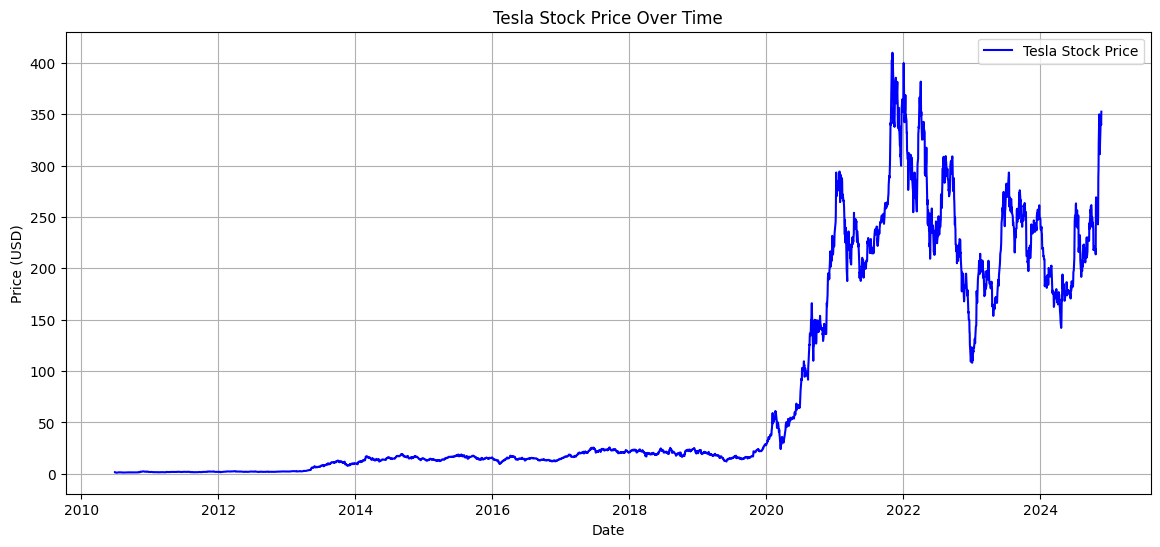

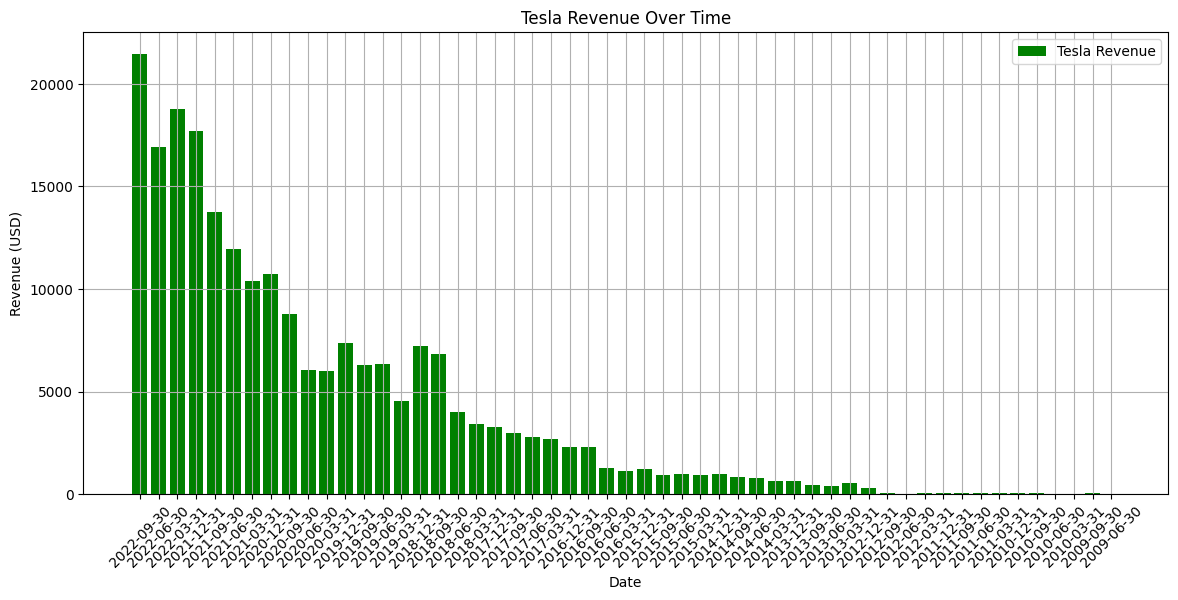

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup

# --- 1. Extracción de datos históricos de acciones de Tesla ---
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# --- 2. Extracción de ingresos de Tesla utilizando Web Scraping ---
url_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url_revenue)
html_data = response.text

# Analizar el contenido HTML
soup = BeautifulSoup(html_data, "html.parser")
table = soup.find_all("table")[1]  
rows = table.find_all("tr")

# Procesar filas y convertirlas en un DataFrame
tesla_revenue = []
for row in rows[1:]:  
    cols = row.find_all("td")
    tesla_revenue.append([col.text.strip() for col in cols])

tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=["Date", "Revenue"])

# Limpiar los datos de ingresos
tesla_revenue_df = tesla_revenue_df[tesla_revenue_df["Revenue"] != ""]
tesla_revenue_df["Revenue"] = tesla_revenue_df["Revenue"].str.replace(",", "").str.replace("$", "")
tesla_revenue_df["Revenue"] = pd.to_numeric(tesla_revenue_df["Revenue"], errors="coerce")
tesla_revenue_df = tesla_revenue_df.dropna(subset=["Revenue"])

# --- 3. Graficar los datos históricos de Tesla ---
plt.figure(figsize=(14, 6))
plt.plot(tesla_data["Date"], tesla_data["Close"], label="Tesla Stock Price", color="blue")
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

# --- 4. Graficar los ingresos de Tesla ---
plt.figure(figsize=(14, 6))
plt.bar(tesla_revenue_df["Date"], tesla_revenue_df["Revenue"], label="Tesla Revenue", color="green")
plt.title("Tesla Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


## 6. Cuadro de mando de acciones e ingresos de GameStop

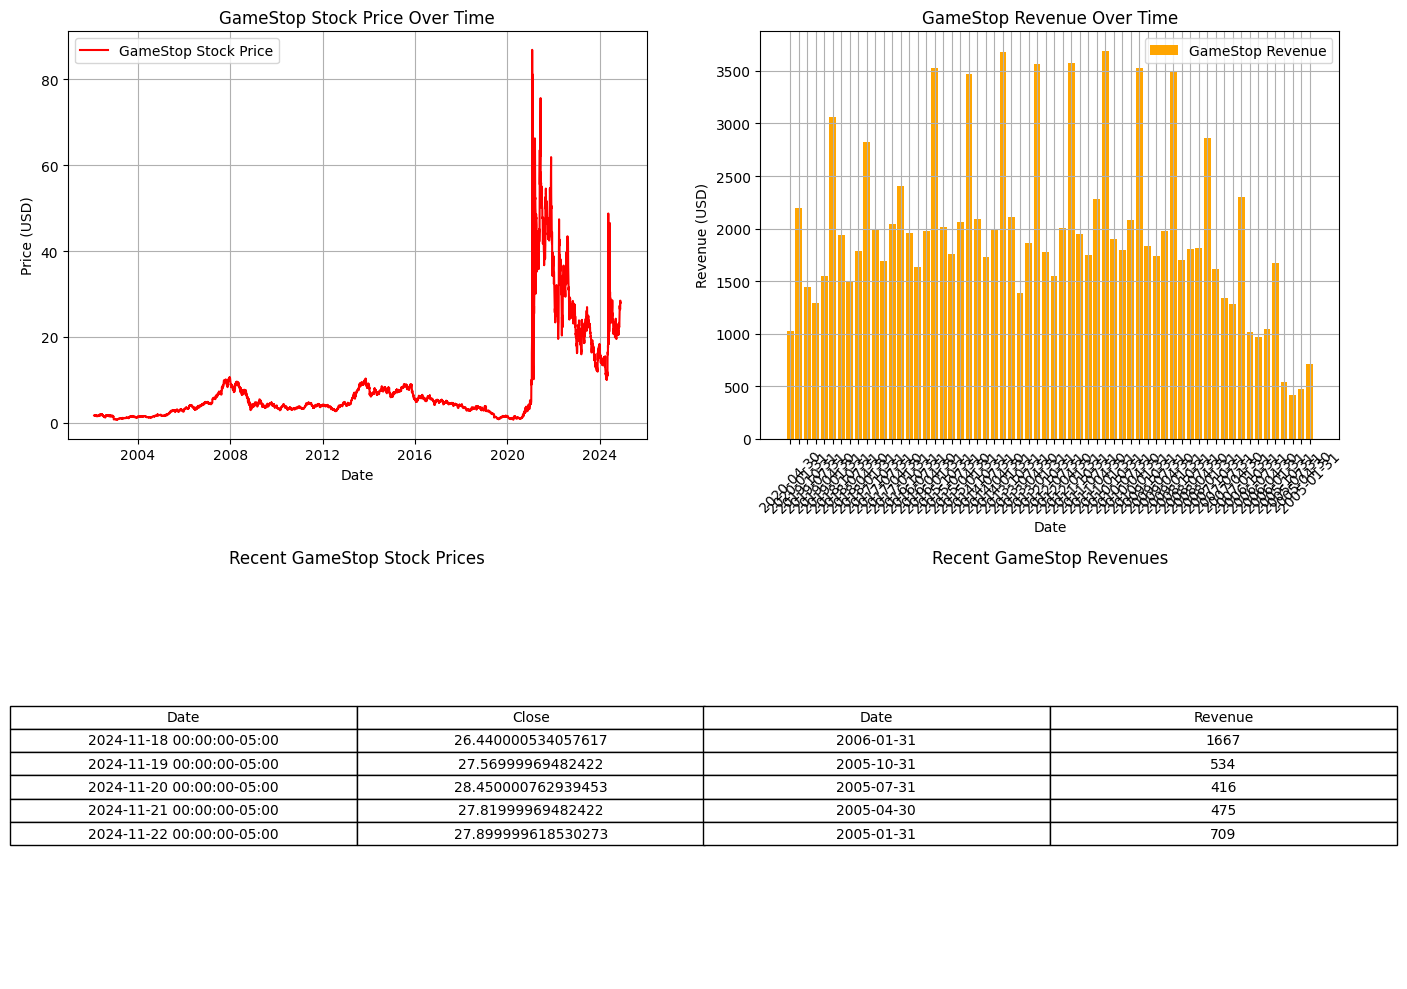

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup

# --- 1. Extracción de datos históricos de acciones de GameStop ---
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)

# --- 2. Extracción de ingresos de GameStop utilizando Web Scraping ---
url_revenue_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response_gme = requests.get(url_revenue_gme)
html_data_2 = response_gme.text  

# Analizar el contenido HTML
soup_gme = BeautifulSoup(html_data_2, "html.parser")
table_gme = soup_gme.find_all("table")[1]  
rows_gme = table_gme.find_all("tr")

# Procesar filas y convertirlas en un DataFrame
gamestop_revenue = []
for row in rows_gme[1:]: 
    cols = row.find_all("td")
    gamestop_revenue.append([col.text.strip() for col in cols])

gamestop_revenue_df = pd.DataFrame(gamestop_revenue, columns=["Date", "Revenue"])

# Limpiar los datos de ingresos
gamestop_revenue_df = gamestop_revenue_df[gamestop_revenue_df["Revenue"] != ""]
gamestop_revenue_df["Revenue"] = gamestop_revenue_df["Revenue"].str.replace(",", "").str.replace("$", "")
gamestop_revenue_df["Revenue"] = pd.to_numeric(gamestop_revenue_df["Revenue"], errors="coerce")
gamestop_revenue_df = gamestop_revenue_df.dropna(subset=["Revenue"])

# --- 3. Crear el cuadro de mando ---
fig, axs = plt.subplots(2, 2, figsize=(14, 10)) 

# Gráfico 1: Precio de acciones de GameStop
axs[0, 0].plot(gamestop_data["Date"], gamestop_data["Close"], label="GameStop Stock Price", color="red")
axs[0, 0].set_title("GameStop Stock Price Over Time")
axs[0, 0].set_xlabel("Date")
axs[0, 0].set_ylabel("Price (USD)")
axs[0, 0].legend()
axs[0, 0].grid()

# Gráfico 2: Ingresos de GameStop
axs[0, 1].bar(gamestop_revenue_df["Date"], gamestop_revenue_df["Revenue"], label="GameStop Revenue", color="orange")
axs[0, 1].set_title("GameStop Revenue Over Time")
axs[0, 1].set_xlabel("Date")
axs[0, 1].set_ylabel("Revenue (USD)")
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].legend()
axs[0, 1].grid()

# Tabla 1: Resumen de precios históricos de GameStop
price_summary = gamestop_data[["Date", "Close"]].tail(5)
axs[1, 0].axis('off') 
table = axs[1, 0].table(cellText=price_summary.values, colLabels=price_summary.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
axs[1, 0].set_title("Recent GameStop Stock Prices")

# Tabla 2: Resumen de ingresos de GameStop
revenue_summary = gamestop_revenue_df.tail(5)
axs[1, 1].axis('off')  
table = axs[1, 1].table(cellText=revenue_summary.values, colLabels=revenue_summary.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
axs[1, 1].set_title("Recent GameStop Revenues")


plt.tight_layout()
plt.show()


# Autor
## Erika Michelle Garcia Medina